<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 2</h2>

<b> Due on: Monday March 4, 2024 at 23:59 ADT</b>

<b> Can be completed in groups of 2 or 3</b>

<small>(One submission per group, and you must list all group members at the top of that submission)</small>
</center>

[Assignment Submission Instructions](https://docs.google.com/document/d/1iHzvkaZzNyZJ54Qw4eXJYOC2vzQUPliMyEBbZVRiS4Q/edit?usp=sharing)

### Group Members:

1.Leon Vermaak(B00894772)
2.Tianzheng Hou(B00889272)
3.Shuqiang Zhang(B00908762)

## **1. Multi-class classification using neural networks**

In this question you will experiment with a neural network in the context of image classification, where a image can belong to one out of several possible categories. The main goal for you is to try different hyperparameters in a systematic manner so that you can propose a network configuration that is properly justified. You will experiment with the [MNIST digits](https://keras.io/api/datasets/mnist/), which can be loaded directly from Keras:

```python
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

In [2]:
import tensorflow as tf
from keras.datasets import mnist
from keras import layers, models

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize values
X_train = X_train / 255
X_test = X_test / 255

Build a sequential model using `keras.models.Sequential` and add dense layers and experiment with it. Compile and train the model.

After building a working model, follow instructions as per Q1.a and Q1.b

In [ ]:
# your code here
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input images from 28x28 to 784
    layers.Dense(256, activation='relu'),  # Dense layer with 128 units and ReLU activation
    layers.Dense(256, activation='relu'),   # Dense layer with 64 units and ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 units for each digit and softmax activation
    ])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1990 - accuracy: 0.9404 - val_loss: 0.0927 - val_accuracy: 0.9694
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0832 - accuracy: 0.9743 - val_loss: 0.0903 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0578 - accuracy: 0.9819 - val_loss: 0.0736 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0723 - val_accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.0786 - val_accuracy: 0.9782


In [ ]:
# evaluate your model by running the code below
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9782
Test score: 0.0786498636007309
Test accuracy: 0.9782000184059143


a) As we load the data from the built-in keras function, it splits them into two subsets; however, it is recommended to split the data into three subsets such as:

```
70% train, 15% val, 15% test
```

Use the mentioned ratios to split the data and train the model using these portions. For each one of your experiments, train the model and report the loss and accuracy of model on the training and validation set. (for more information check this [link](https://scikit-learn.org/stable/modules/learning_curve.html#:~:text=2.-,Learning%20curve,error%20or%20a%20bias%20error.))  

> Note: since the dataset is already split into train and test sets for you, you should concatenate and shuffle the two sets before splitting them again to achieve the ratios you want


In [ ]:
# your code here
import numpy as np
from sklearn.model_selection import train_test_split

train_ratio = 0.7
val_ratio = 0.15

# Concatenate
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))


#Shuffle
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split the data into train, validation, and test sets
num_samples = len(X)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)

# Split the data
X_train, X_val, X_test = X[:num_train], X[num_train:num_train+num_val], X[num_train+num_val:]
y_train, y_val, y_test = y[:num_train], y[num_train:num_train+num_val], y[num_train+num_val:]

# Train the model using X_train and y_train, and validate using X_val and y_val
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Epoch 1/5
1532/1532 [==============================] - 11s 7ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.0324 - val_accuracy: 0.9885
Epoch 2/5
1532/1532 [==============================] - 11s 7ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0365 - val_accuracy: 0.9879
Epoch 3/5
1532/1532 [==============================] - 10s 7ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0405 - val_accuracy: 0.9880
Epoch 4/5
1532/1532 [==============================] - 10s 7ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0462 - val_accuracy: 0.9857
Epoch 5/5
329/329 [==============================] - 1s 3ms/step - loss: 0.0611 - accuracy: 0.9859
Test score: 0.06106458604335785
Test accuracy: 0.9859047532081604


b) Experiment with different hyperparameters and report your best accuracy found. The most important hyperparameters that you need to experiment with in this question part are:

* number of layers
* nodes per hidden layer
* learning rate
* number of epochs

Perform at least three experiments, being sure to vary only one hyperparameter at a time. To select the best choice of hyperparameters, draw the loss and accuracy curve.

In [ ]:
# your code here
from keras import optimizers

def create_model_and_test(num_layers, num_nodes, learning_rate, epoch):
    #create model
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    #add hidden layers
    for _ in range(num_layers):
        model.add(layers.Dense(num_nodes, activation='relu'))

    #output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the specified learning rate
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #get model loss and accuracy
    model.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test)

    #return model loss and accuracy
    return [score[0], score[1]]




# Experimental hyperparameters
layers_list = [1, 2, 3, 4, 5]
nodes_list = [128, 256, 384, 512, 640]
learning_list = [0.01, 0.005, 0.001, 0.0005, 0.0001]
epochs_list = [3, 5, 7, 10, 15]




#experiment with number of layers
layers_loss = []
layers_accuracy = []
for i in layers_list:
  model_to_test = create_model_and_test(i, 256, 0.001, 5)
  layers_loss.append(model_to_test[0])
  layers_accuracy.append(model_to_test[1])

#experiment with nodes per hidden layer
nodes_loss = []
nodes_accuracy = []
for i in nodes_list:
  model_to_test = create_model_and_test(2, i, 0.001, 5)
  nodes_loss.append(model_to_test[0])
  nodes_accuracy.append(model_to_test[1])

#experiment with learning rate
learning_loss = []
learning_accuracy = []
for i in learning_list:
  model_to_test = create_model_and_test(2, 256, i, 5)
  learning_loss.append(model_to_test[0])
  learning_accuracy.append(model_to_test[1])

#experiment with number of epochs
epochs_loss = []
epochs_accuracy = []
for i in epochs_list:
  model_to_test = create_model_and_test(2, 256, 0.001, i)
  epochs_loss.append(model_to_test[0])
  epochs_accuracy.append(model_to_test[1])

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2256 - accuracy: 0.9344 - val_loss: 0.1133 - val_accuracy: 0.9655
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0937 - accuracy: 0.9719 - val_loss: 0.0831 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0788 - val_accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0653 - val_accuracy: 0.9794
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0771 - accuracy: 0.9767
Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1985 - accuracy: 0.9406 - val_loss: 0.1119 - val_accuracy: 0.9663
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0848 - accuracy: 0.9740 - val_loss: 0.0930 - val_accuracy: 0.9727
Epoch 3/5
1875/1875 [======================

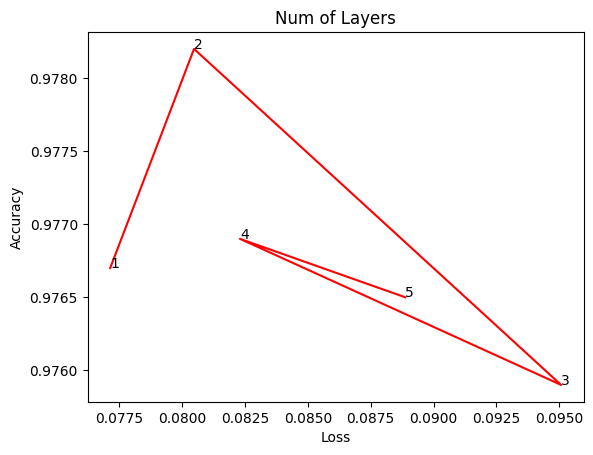

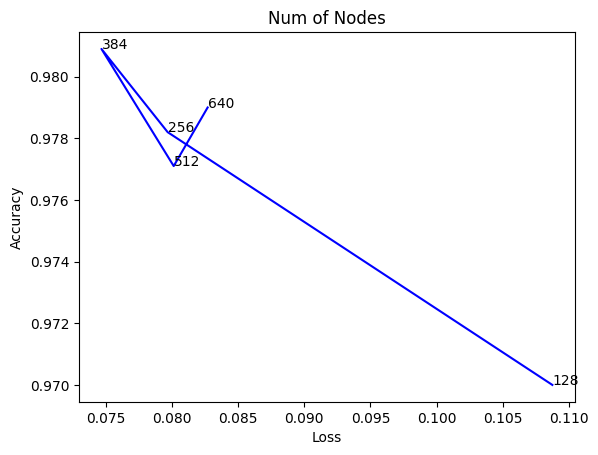

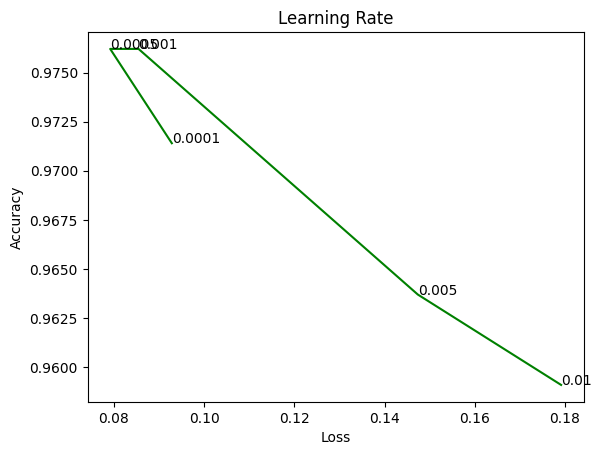

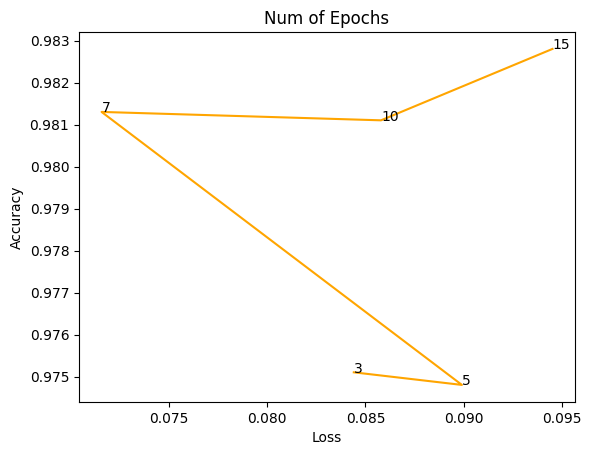

In [ ]:
import matplotlib.pyplot as plt

def plotData(x, y, colour, list):
    plt.plot(x, y, color=colour)
    # Labeling the points
    for i in range(len(y)):
        plt.annotate(str(list[i]), (x[i], y[i]))

plotData(layers_loss, layers_accuracy, "red", layers_list)
plt.title("Num of Layers")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.show()

plotData(nodes_loss, nodes_accuracy, "blue", nodes_list)
plt.title("Num of Nodes")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.show()

plotData(learning_loss, learning_accuracy, "green", learning_list)
plt.title("Learning Rate")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.show()

plotData(epochs_loss, epochs_accuracy, "orange", epochs_list)
plt.title("Num of Epochs")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.show()



layers_list = [1, 2, 3, 4, 5]

nodes_list = [128, 256, 384, 512, 640]

learning_list = [0.01, 0.005, 0.001, 0.0005, 0.0001]

epochs_list = [3, 5, 7, 10, 15]

From our experiments the optimal number of
layers is 2, nodes is 384, learning rate is 0.0005
and epochs is 7. We dont belive that creating a network
with these hyper parameters would be optimal, as these hyper
parameters are dependant on each other. Such as the number of
layers and hidden nodes. As well as learning rate and number
of epochs

## **2. Tuning generalization**

In this question you will construct a neural network to classify a large set of low resolution images. Different from Q1, in this case we suggest a neural network to start experimenting with, but we would like you to describe the behavior of the network as you modify certain parameters. You will be reproducing some concepts mentioned during the lectures, such as when we show how generalization changes as the number of parameters are changed.

a) Use the CIFAR-100 dataset (available from Keras)

```python
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) =
cifar100.load_data(label_mode='fine')
```
to train a neural network with two hidden layers using the logistic activation function, with 500 and 200 hidden nodes, respectively. The output layer should be defined according to the nature of the targets.

a) Generate a plot that shows average precision for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.

> Hint: Keras' `history` callback may be a helpful utility here.

In [5]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
x_train_original, x_test_original = x_train_original / 255.0, x_test_original / 255.0

In [ ]:
from keras.callbacks import History
# your model code here
num_classes = 100
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),  # Flatten input images from 32x32x3 to 3072
    layers.Dense(500, activation='sigmoid'),
    layers.Dense(200, activation='sigmoid'),
    layers.Dense(num_classes, activation='sigmoid')  # Output layer with num_classes units
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = History()
model.fit(x_train_original, y_train_original, epochs=50, validation_data=(x_test_original, y_test_original), callbacks=[history])

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 4.2302 - accuracy: 0.0518 - val_loss: 4.0882 - val_accuracy: 0.0743
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 3.9137 - accuracy: 0.0959 - val_loss: 3.8578 - val_accuracy: 0.1094
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 3.7765 - accuracy: 0.1187 - val_loss: 3.7642 - val_accuracy: 0.1265
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 3.6959 - accuracy: 0.1362 - val_loss: 3.7213 - val_accuracy: 0.1320
Epoch 5/50
1563/1563 [==============================] - 5s 4ms/step - loss: 3.6386 - accuracy: 0.1455 - val_loss: 3.6265 - val_accuracy: 0.1534
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 3.5827 - accuracy: 0.1528 - val_loss: 3.6144 - val_accuracy: 0.1541
Epoch 7/50
1563/1563 [==============================] - 5s 4ms/step - loss: 3.5317 - accuracy: 0.1611 - val_loss: 3.5544 - val_accuracy:

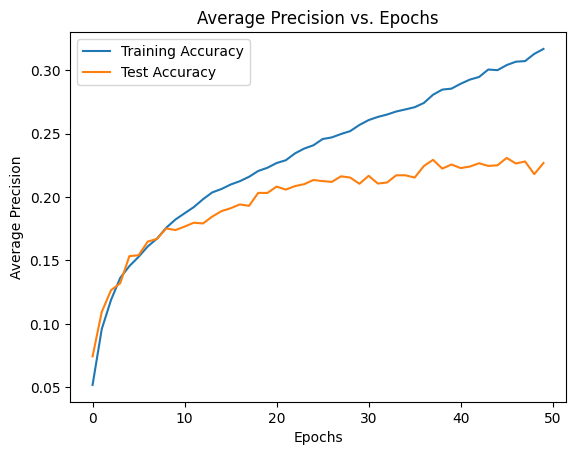

In [ ]:
import matplotlib.pyplot as plt
# your plotting code here
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Average Precision vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Precision')
plt.legend()
plt.show()
# In the 2 a we use 50 epochs, the training accuracy will keep growing when we add more epochs
# But it will grow slower and slower
# The test accuracy flacuate between 0.2 and it will stop at that point. So we think we can stop on
# epoch 20 - 22 to safe more time.

b) Generate a plot that shows average precision for training and test sets as a function of the number of weights/parameters (# hidden nodes). For this part, you will be modifying the architecture that was given to you as a starting point.

313/313 [==============================] - 0s 1ms/step


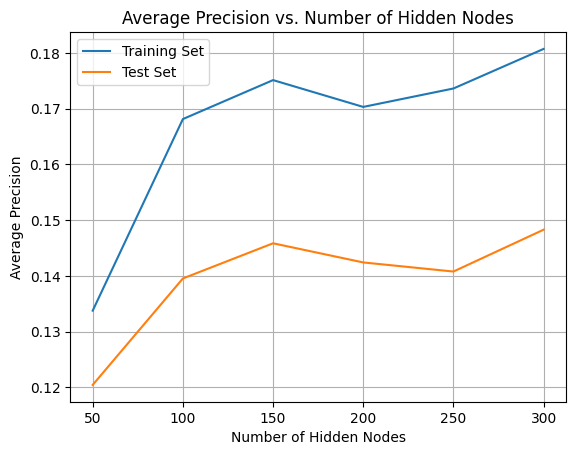

In [6]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train_original, 100)
y_test = to_categorical(y_test_original, 100)

def create_model(hidden_nodes):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(hidden_nodes, activation='sigmoid'),
        layers.Dense(100, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train, epochs=25, verbose=0)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_avg_precision = average_precision_score(y_train, y_train_pred)
    test_avg_precision = average_precision_score(y_test, y_test_pred)
    return train_avg_precision, test_avg_precision

# Define number of hidden nodes to evaluate
hidden_nodes_list = [50, 100, 150, 200, 250, 300]

train_avg_precision_list = []
test_avg_precision_list = []

# Evaluate models with different numbers of hidden nodes
for hidden_nodes in hidden_nodes_list:
    model = create_model(hidden_nodes)
    train_avg_precision, test_avg_precision = evaluate_model(model, x_train_original, y_train, x_test_original, y_test)
    train_avg_precision_list.append(train_avg_precision)
    test_avg_precision_list.append(test_avg_precision)

# Plot results
plt.plot(hidden_nodes_list, train_avg_precision_list, label='Training Set')
plt.plot(hidden_nodes_list, test_avg_precision_list, label='Test Set')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Average Precision')
plt.title('Average Precision vs. Number of Hidden Nodes')
plt.legend()
plt.grid(True)
plt.show()

# The Test set and training set precision all stop growing after 250 nodes, so more hidden nodes do not means more precision
# But it does not means that 250 is the best result, It might have better but for the lacking calculation power of my computer
# I can not find more optimum answer other than this.a

c) Generate a plot that shows average precision for training and test sets as a function of the number of instances in the training set. For this part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until
you use the entire training set. Keep the network hyperparameters constant during your experiments.

313/313 [==============================] - 0s 971us/step


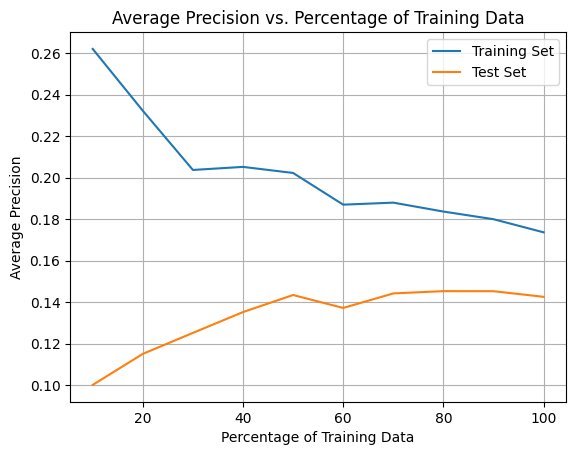

In [7]:
# your code here
# Define number of hidden nodes to evaluate from question 2b
hidden_nodes = 250

train_avg_precision_list = []
test_avg_precision_list = []

# Define the percentages of training data to use, increase 0.1 each time
percentages = np.arange(0.1, 1.1, 0.1)

# Perform experiments
for percentage in percentages:
    # Randomly select a subset of the training data
    num_samples = int(len(x_train_original) * percentage)
    indices = np.random.choice(len(x_train_original), num_samples, replace=False)
    x_train_subset = x_train_original[indices]
    y_train_subset = y_train[indices]

    model = create_model(hidden_nodes)
    train_avg_precision, test_avg_precision = evaluate_model(model, x_train_subset, y_train_subset, x_test_original, y_test)
    train_avg_precision_list.append(train_avg_precision)
    test_avg_precision_list.append(test_avg_precision)

# Plot results
plt.plot(percentages * 100, train_avg_precision_list, label='Training Set')
plt.plot(percentages * 100, test_avg_precision_list, label='Test Set')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Average Precision')
plt.title('Average Precision vs. Percentage of Training Data')
plt.legend()
plt.grid(True)
plt.show()

# The graph shows that in 150 hidden node and 1 hidden layer model trained
# with different amount of the training data. The interesting thing shows that
# As more percentage of the data we use, the gap between training set and testing
# set becomes smaller. This is because at first, 10% of the original data will
# make higher accuracy on the original test, but because not enough data we
# trained, the test set's accuracy is the worst. Later on we used 100% of the
# data, which bing down the training accuracy but the test accuracy is growing up.

d) Define the best network architecture from your experiments above and report the accuracy and average precision for all classes.



In [8]:
# your code here
best_architecture_index = np.argmax(test_avg_precision_list)
best_percentage = percentages[best_architecture_index]
best_avg_precision = test_avg_precision_list[best_architecture_index]
print(f"Best architecture: {hidden_nodes} hidden nodes, {best_percentage*100}% of training data used")
print(f"Best average precision on test set: {best_avg_precision}")
best_model = create_model(hidden_nodes)

# Train the best model using the entire training set
best_model.fit(x_train_original, y_train, epochs=10, batch_size=64, verbose=0)

# Evaluate accuracy on test set
test_loss, test_accuracy = best_model.evaluate(x_test_original, y_test, verbose=0)
print(f"Accuracy on test set: {test_accuracy}")

# Evaluate average precision for all classes
y_test_pred = best_model.predict(x_test_original)
avg_precision_per_class = []
for i in range(100):
    avg_precision = average_precision_score(y_test[:, i], y_test_pred[:, i])
    avg_precision_per_class.append(avg_precision)

print("Average Precision per class:")
for i, avg_precision in enumerate(avg_precision_per_class):
    print(f"Class {i}: {avg_precision}")

Best architecture: 250 hidden nodes, 80.0% of training data used
Best average precision on test set: 0.14528947451730786
Accuracy on test set: 0.19900000095367432
313/313 [==============================] - 0s 904us/step
Average Precision per class:
Class 0: 0.3489274407801075
Class 1: 0.16477049519832435
Class 2: 0.0912544081893644
Class 3: 0.07912567505047208
Class 4: 0.03603828063071564
Class 5: 0.08335500605755171
Class 6: 0.13731427697169618
Class 7: 0.13347670819860405
Class 8: 0.12701681779727317
Class 9: 0.23514326175780476
Class 10: 0.03796962540924016
Class 11: 0.06020118225690866
Class 12: 0.12323793436412665
Class 13: 0.09446492834724596
Class 14: 0.05970766966926329
Class 15: 0.08117626963989595
Class 16: 0.1510121401621666
Class 17: 0.1729125017086303
Class 18: 0.13787252460133242
Class 19: 0.122524933293617
Class 20: 0.26442157672141325
Class 21: 0.2576514016969107
Class 22: 0.16147290982579016
Class 23: 0.3212598266471247
Class 24: 0.27962265817936455
Class 25: 0.0511973

e) Can you improve test prediction performance by using an ensemble of neural networks? Explain with words (don't implement!)

Yes but only if the ensmeble of networks are all trained on different data, and there predicitions are completly independant from each other.